# 0.0 Imports

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns


# 0.1 Functions

# 1 Data Description

## 1.1 Data Extraction and copy

In [70]:
# Data extraction
df = pd.read_csv('C:/Users/ThalesSilva/Documents/repos/large_files/amazon_eda/amz_br_total_products_data_processed.csv')

# Copy of dataset in order to preserve raw data
df1 = df.copy()




ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## 1.2 Cols Names Transformation

In [ ]:
# Cols names transformation (if necessary) - No need to transform columns names as they are already in camel case


## 1.3 Dataset Dimensions

In [ ]:
# Data dimensions (shape of df)
print(f'The number of columns in the dataset is:', df1.shape[0])
print(f'The number of columns in the dataset is:', df1.shape[1])


The number of columns in the dataset is: 1344513
The number of columns in the dataset is: 11


## 1.4 - Data Types Observation

In [ ]:
df1.dtypes

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
categoryName          object
isBestSeller            bool
boughtInLastMonth      int64
dtype: object

## 1.5 Check NA

In [ ]:
df1.isna().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

## 1.6 Fill NA

In [ ]:
# No need to filL NA's as the dataset do not have any.


## 1.7 Data Types Transformation

In [ ]:
# No need to change data types. The dataset already has tem set correctly.



## 1.8 Drop Columns

In [76]:
df1 = df1.drop(df1[['asin', 'imgUrl', 'productURL']], axis=1)

### 1.9 Duplicate Values

In [81]:
df1.duplicated().sum()

9874

## 1.9 Descriptive Stats

### 1.9.1 Numerical Variables

In [ ]:
# Surpassing exponantial notation into 2 decimals format
pd.options.display.float_format = '{:.2f}'.format

num_var = df1.select_dtypes(include=['float64', 'int64'])
num_var.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,1344513.00,1344513.00,1344513.00,1344513.00,1344513.00
mean,1.47,212.23,217.86,65.30,4.35
std,2.11,4581.19,856.21,2874.17,94.36
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,25.00,0.00,0.00
50%,0.00,0.00,69.00,0.00,0.00
75%,4.20,3.00,153.99,0.00,0.00
max,5.00,1878552.00,100000.00,1999000.00,40000.00


### 1.8.1 Categorical Variables

In [ ]:
cat_var = df1.select_dtypes(exclude=['float64', 'int64'])

# Finding unique categories for each categorical variable
cat_var.apply(lambda x: x.unique().shape[0])

asin            1344513
title           1308169
imgUrl          1168557
productURL      1344513
categoryName        206
isBestSeller          2
dtype: int64

# 2 Hypothesis Map 

In [ ]:
# Client view
    # Categories with higher stars sell more
    # Categories with more reviews sell more
    # Categories best seller sell more
    # Categories bouth in last month sell more

# Price view
    # How the price of products is divided by category?
    # How the price of products is divided by range of price?
    # Products with listprice sell more

# 3 EDA

In [82]:
# Copy of dataset 
df2 = df1.copy()

## 3.1 Categories with higher stars sell more

### False: 

<Axes: xlabel='stars_binned', ylabel='price'>

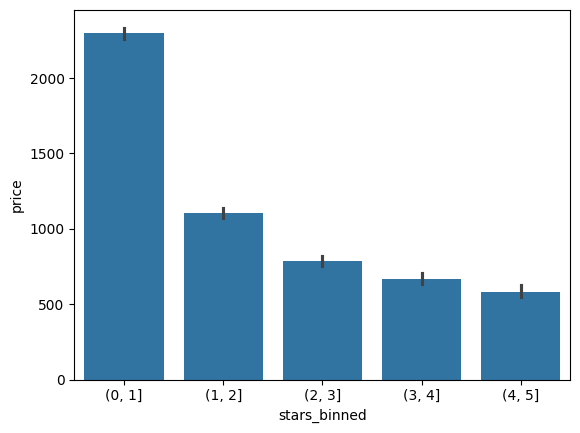

In [89]:
# Group by
aux1 = df2[['price', 'stars']].groupby('price').sum().reset_index()

# Bins
bins = list(np.arange(0,6,1))
aux1['stars_binned'] = pd.cut(aux1['stars'], bins=bins)

# Plot
sns.barplot(x='stars_binned', y='price', data=aux1)


In [ ]:
#Analyze pricing trends across different product categories.
#Explore the correlation between customer ratings and the number of reviews.
#Identify the best-selling products on Amazon.com.br.
#Study the relationship between pricing and customer reviews.
#Create a recommendation system based on customer ratings and product categories.
#Analyze the availability of products in different price ranges.